# Beer in Texas

## Most Relevent Business Questions
1. What is the craft beer consumption in ATX, DFW, HOU, San Antonio?
2. How has it changed over the past 3-5 Years?
3. How have the prices developed in this timeframe?
4. How did beer gardens perform compared to the overall trend?
5. Did price changes have an impact on quantity?
6. Who are the top sellers in the Cities stated in #1?
7. What other trends are standing out? 

## 1. Imports & Paths

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 999
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
import seaborn as sns
import matplotlib

### 1.1 Data Paths

In [11]:
RECEIPTS_PATH = os.path.abspath(os.path.join("", 'input', 'Mixed_Beverage_Gross_Receipts.csv'))

## 2.0 Data Wrangling

In [12]:
df = pd.read_csv(RECEIPTS_PATH)

# Convert to TimeStamps
df['Responsibility Begin Date'] = pd.to_datetime(df['Responsibility Begin Date']) # Date location was liable for mixed beverage gross receipts.
df['Responsibility End Date'] = pd.to_datetime(df['Responsibility End Date']) # Date location became inactive for mixed beverage gross receipts.
df['Obligation End Date'] = pd.to_datetime(df['Obligation End Date']) # Reporting period end date.

df.dtypes

Taxpayer Number                        int64
Taxpayer Name                         object
Taxpayer Address                      object
Taxpayer City                         object
Taxpayer State                        object
Taxpayer Zip                         float64
Taxpayer County                        int64
Location Number                        int64
Location Name                         object
Location Address                      object
Location City                         object
Location State                        object
Location Zip                           int64
Location County                        int64
Inside/Outside City Limits            object
TABC Permit Number                    object
Responsibility Begin Date     datetime64[ns]
Responsibility End Date       datetime64[ns]
Obligation End Date           datetime64[ns]
Liquor Receipts                        int64
Wine Receipts                          int64
Beer Receipts                          int64
Cover Char

### 2.1 Data Inspection

#### Identify Matching Records

In [17]:
# Groupby based on TABC
    # NOTE: 'TABC Permit Number' is a unique number issued by the TABC for the specific location
categories = ['TABC Permit Number','Obligation End Date']
grp = df.groupby(by=categories, sort = False)
df_grp = grp.size()
filt = df_grp > 1
print('Found', sum(filt) ,'matching records')
duplicates_indices = df_grp[filt].index

Found 3152 matching records


Note: They are not duplicates, they have different information, even though no explanation found on why they have same TABC Number and Obligation Date

#### Looking at the matching records

In [14]:
df_duplicates = df.set_index(categories)
df_duplicates = df_duplicates.loc[duplicates_indices]
df_duplicates.head(4)

Taxpayer Number  \
TABC Permit Number Obligation End Date                    
MB884655           2017-10-31               32054912152   
                   2017-10-31               32054912152   
MB617996           2010-05-31               13836991276   
                   2010-05-31               13836991276   

                                                Taxpayer Name  \
TABC Permit Number Obligation End Date                          
MB884655           2017-10-31               RON DALLAS ADKINS   
                   2017-10-31               RON DALLAS ADKINS   
MB617996           2010-05-31           CULINARY AMBITION LLC   
                   2010-05-31           CULINARY AMBITION LLC   

                                                      Taxpayer Address  \
TABC Permit Number Obligation End Date                                   
MB884655           2017-10-31                    4313 N 10TH ST STE A1   
                   2017-10-31                    4313 N 10TH ST STE A1   
MB617996           2010-05-31           3230 PABLO KISEL BLVD STE F102   
                   2010-05-31           3230 PABLO KISEL BLVD STE F102   

                                       Taxpayer City Taxpayer State  \
TABC Permit Number Obligation End Date                                
MB884655           2017-10-31                MCALLEN             TX   
                   2017-10-31                MCALLEN             TX   
MB617996           2010-05-31            BROWNSVILLE             TX   
                   2010-05-31            BROWNSVILLE             TX   

                                        Taxpayer Zip  Taxpayer County  \
TABC Permit Number Obligation End Date                                  
MB884655           2017-10-31                78504.0              108   
                   2017-10-31                78504.0              108   
MB617996           2010-05-31                78526.0               31   
                   2010-05-31                78526.0               31   

                                        Location Number  \
TABC Permit Number Obligation End Date                    
MB884655           2017-10-31                         1   
                   2017-10-31                         3   
MB617996           2010-05-31                         1   
                   2010-05-31                         2   

                                                          Location Name  \
TABC Permit Number Obligation End Date                                    
MB884655           2017-10-31                    MY BAR SPORTS AND MORE   
                   2017-10-31                                CLUB NITRO   
MB617996           2010-05-31                                  LA PAMPA   
                   2010-05-31           LA PAMPA ARGENTINEAN STEAKHOUSE   

                                                      Location Address  \
TABC Permit Number Obligation End Date                                   
MB884655           2017-10-31                            307 S 17TH ST   
                   2017-10-31                            320 S 17TH ST   
MB617996           2010-05-31           1655 RUBEN TORRES BLVD STE 208   
                   2010-05-31                   3300 N MCCOLL RD STE O   

                                       Location City Location State  \
TABC Permit Number Obligation End Date                                
MB884655           2017-10-31                MCALLEN             TX   
                   2017-10-31                MCALLEN             TX   
MB617996           2010-05-31            BROWNSVILLE             TX   
                   2010-05-31                MCALLEN             TX   

                                        Location Zip  Location County  \
TABC Permit Number Obligation End Date                                  
MB884655           2017-10-31                  78501              108   
                   2017-10-31                  78501              108   
MB617996     

In [7]:
COLUMNS = ['Taxpayer Number', 'Taxpayer Name', 'Taxpayer Address', 'Taxpayer City',
       'Taxpayer Zip', 
       'Location Name', 'Location Address', 'Location City',     
       'Responsibility Begin Date', 'Responsibility End Date',
       'Liquor Receipts', 'Wine Receipts', 'Beer Receipts',
       'Cover Charge Receipts', 'Total Receipts']

### 2.2 Data Range

In [24]:
df['Total Receipts'].describe()

count    2.788501e+06
mean     3.256002e+04
std      6.037127e+04
min      0.000000e+00
25%      3.799000e+03
50%      1.592900e+04
75%      3.959400e+04
max      7.065446e+06
Name: Total Receipts, dtype: float64

In [33]:
df['Total Receipts'].quantile([0.8,0.9,0.95,0.99,0.995, 0.999])

0.800     48245.0
0.900     78940.0
0.950    116904.0
0.990    243425.0
0.995    321157.5
0.999    584863.0
Name: Total Receipts, dtype: float64

#### KDE

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,6), sharey = True)

sns.kdeplot(data=df, x='Total Receipts', clip=(0, 300000), ax=ax[0], fill = 'skyblue')
sns.kdeplot(data=df, x='Total Receipts', clip=(0, 20000), ax=ax[1], fill = 'skyblue')

In [8]:
# You need to look at Ballparks
# Maybe look a few locations, Maybne over a 1000 is too much, look at the distribution.

df[df['Location City'] == 'HOUSTON'].sort_values(by = 'Total Receipts', ascending = False)[:5]

,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
1327620,12325735848,ARAMARK SPORTS AND ENTERTAINMENT SERVICES OF T...,PO BOX 7548 ATTN: KIM KEENAN,PHILADELPHIA,PA,19101.0,0,19,ARAMARK SPORTS & ENTERTAINMENT SER OF TEXAS INC,8355 KIRBY DR,HOUSTON,TX,77054,101,Y,MB520931,2002-08-14,NaT,2014-03-31,20998,404948,4890745,0,5316691
727050,12325735848,ARAMARK SPORTS AND ENTERTAINMENT SERVICES OF T...,PO BOX 7548 ATTN: KIM KEENAN,PHILADELPHIA,PA,19101.0,0,17,ARAMARK SPORTS & ENTERTAINMENT SERVICES OF TEXAS,501 CRAWFORD ST - MINUTE MAID PARK,HOUSTON,TX,77002,101,Y,MB905697,2015-04-24,NaT,2021-10-31,2406451,328431,2465474,0,5200356
308931,12325735848,ARAMARK SPORTS AND ENTERTAINMENT SERVICES OF T...,PO BOX 7548 ATTN: KIM KEENAN,PHILADELPHIA,PA,19101.0,0,19,ARAMARK SPORTS & ENTERTAINMENT SER OF TEXAS INC,8355 KIRBY DR,HOUSTON,TX,77054,101,Y,MB520931,2002-08-14,NaT,2022-03-31,2548863,300175,1522140,0,4371178
645126,12325735848,ARAMARK SPORTS AND ENTERTAINMENT SERVICES OF T...,PO BOX 7548 ATTN: KIM KEENAN,PHILADELPHIA,PA,19101.0,0,17,ARAMARK SPORTS & ENTERTAINMENT SERVICES OF TEXAS,501 CRAWFORD ST - MINUTE MAID PARK,HOUSTON,TX,77002,101,Y,MB905697,2015-04-24,NaT,2019-10-31,1803028,246076,1847251,0,3896355
634511,17420797635,"CORRAL CLUB, INC.",3 NRG PARK,HOUSTON,TX,77054.0,101,1,THREE NRG PARK,2000 SOUTH LOOP W,HOUSTON,TX,77054,101,Y,MB121117,1993-12-01,NaT,2017-03-31,2304366,242637,1204651,0,3751654


In [ ]:
df['Total Receipts'].describe()

In [36]:
df['Total Receipts'].quantile([0.8,0.9,0.95,0.99,0.995, 0.999])

0.800     48245.0
0.900     78940.0
0.950    116904.0
0.990    243425.0
0.995    321157.5
0.999    584863.0
Name: Total Receipts, dtype: float64

In [37]:
filt_large_contributors = df['Total Receipts'] >= 584863.0
# df[filt_large_contributors][20:30]

### 2.3 Look at the beer ratio

In [ ]:
filt = pd.isnull(pdf['Beer Receipts'].val

In [41]:
df['pct_beer'] = df['Beer Receipts'] / df['Total Receipts']

In [63]:
pct_beers = np.nan_to_num(df['pct_beer'], nan=0.0)
pct_beers

array([0.        , 0.67385974, 0.33804952, ..., 0.        , 0.38147668,
       0.14950347])

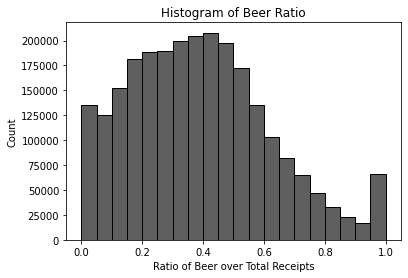

In [58]:
n, bins, patches = plt.hist(df['pct_beer'].values, 
                            20,
                            color = '#5F5F5F',
                            edgecolor = "black")
plt.xlabel('Ratio of Beer over Total Receipts')
plt.ylabel('Count')
plt.title('Histogram of Beer Ratio')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.show()

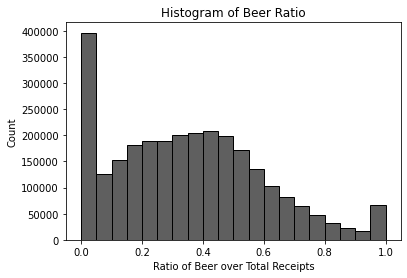

In [78]:
n, bins, patches = plt.hist(pct_beers, 
                            20,
                            color = '#5F5F5F',
                            edgecolor = "black")
plt.xlabel('Ratio of Beer over Total Receipts')
plt.ylabel('Count')
plt.title('Histogram of Beer Ratio')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.show()

In [ ]:
np.where(np.isnan((df['pct_beer'].values ))

In [64]:
hist, edges = np.histogram(pct_beers, density=True, bins=20)

In [ ]:
hist, edges = np.histogram(pct_beers, density=True, bins=20)

In [76]:
def make_plot(title, hist, edges):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
#     p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")
#     p.line(x, cdf, line_color="orange", line_width=2, alpha=0.7, legend_label="CDF")

    p.y_range.start = 0
#     p.legend.location = "center_right"
#     p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    return p

hist, edges = np.histogram(pct_beers, density=False, bins=20)
p1 = make_plot("Normal Distribution (μ=0, σ=0.5)", hist, edges)
x = np.linspace(-2, 2, 1000)

In [54]:
pct_beer = df['pct_beer'].sort_values(ascending = False)

In [42]:
df

,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts,pct_beer
0,32047970895,HONDURAS MAYA CAFE & BAR LLC,8011 HAZEN ST,HOUSTON,TX,77036.0,101,1,HONDURAS MAYA CAFE & BAR LLC,5945 BELLAIRE BLVD STE B,HOUSTON,TX,77081,101,Y,MB817033,2012-08-16,2019-09-12,2019-07-31,0,0,0,0,0,NaN
1,32049923835,"MERMAID KARAOKE PRIVATE CLUB, INC.",2639 WALNUT HILL LN STE 225,DALLAS,TX,75229.0,57,1,MERMAID KARAOKE PRIVATE CLUB,1310 W CAMPBELL RD STE 103,RICHARDSON,TX,75080,57,Y,N 837378,2013-04-12,2015-07-01,2014-08-31,480,185,1374,0,2039,0.673860
2,32034036304,FENG KAI CORPORATION,8427 BOULEVARD 26,N RICHLND HLS,TX,76180.0,220,1,JAPANESE GRILL,8427 BOULEVARD 26,NORTH RICHLAND HILLS,TX,76180,220,Y,MB576670,2008-05-01,2018-03-17,2016-06-30,1143,167,669,0,1979,0.338050
3,14537211071,"THE HUTTO SMITHS, LLC",429 LITTLE LAKE RD,HUTTO,TX,78634.0,246,1,THE DOWNTOWN HALL OF FAME,205 EAST ST,HUTTO,TX,78634,246,Y,MB791778,2011-12-06,NaT,2018-03-31,12881,357,10447,0,23685,0.441081
4,32019999229,"THE CROSSING AT FIDDLE CREEK, INC.",1620 W CEDAR ST,STEPHENVILLE,TX,76401.0,72,1,THE CROSSING AT FIDDLE CREEK INC,2004 W SWAN ST,STEPHENVILLE,TX,76401,72,Y,N 643163,2006-10-26,2013-11-30,2008-08-31,4841,2413,4620,0,11874,0.389085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788496,32045900001,COUTURE HOTEL CORPORATION,2803 SAINT ANDREWS CIR,ENNIS,TX,75119.0,70,4,WYNDHAM GARDEN DALLAS NORTH,2645 LYNDON B JOHNSON FWY,FARMERS BRANCH,TX,75234,57,Y,MB814378,2014-12-01,2022-07-24,2016-10-31,32573,13997,0,52040,98610,0.000000
2788497,32004531698,STEPHEN N ZIMMERMAN,3410 MONTROSE BLVD,HOUSTON,TX,77006.0,101,2,LA COLOMBE D'OR,3410 MONTROSE BLVD,HOUSTON,TX,77006,101,Y,MB126836,1993-12-01,NaT,2007-11-30,5799,31809,802,0,38410,0.020880
2788498,32069471368,GORZUGIS SABINAL LLC,PO BOX 420806,DEL RIO,TX,78842.0,233,1,GORZUGIS,317 N CENTER ST,SABINAL,TX,78881,232,Y,MB1050103,2019-04-08,2022-07-26,2021-11-30,0,0,0,0,0,NaN
2788499,32048588530,"BEANSTALK, LLC",2950 S JOHN REDDITT DR,LUFKIN,TX,75904.0,3,1,TOKYO JAPANESE RESTAURANT,2950 S JOHN REDDITT DR,LUFKIN,TX,75904,3,Y,RM832251,2013-02-20,2022-08-08,2018-06-30,0,955,589,0,1544,0.381477


In [70]:
np.log(total_receipts[total_receipts!=0])

array([ 7.62021477,  7.59034695, 10.07259722, ..., 10.55607312,
        7.34213173, 10.288886  ])

(array([2.440000e+02, 1.461000e+03, 8.804000e+03, 6.056500e+04,
        2.580300e+05, 6.668670e+05, 1.132528e+06, 3.829290e+05,
        1.603300e+04, 4.050000e+02]),
 array([0.        , 0.68491396, 1.36982792, 2.05474187, 2.73965583,
        3.42456979, 4.10948375, 4.79439771, 5.47931167, 6.16422562,
        6.84913958]),
 <BarContainer object of 10 artists>)

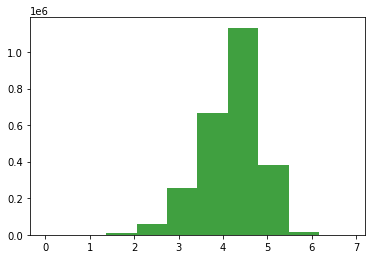

In [72]:
fig, ax = plt.subplots()
ax.hist(np.log10(total_receipts[total_receipts!=0]), facecolor='g', alpha=0.75)

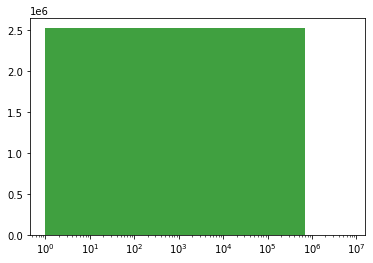

In [77]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(total_receipts[total_receipts!=0], bins = 10, facecolor='g', alpha=0.75)
ax.set_xscale('log')

In [78]:
bins

array([1.0000000e+00, 7.0654550e+05, 1.4130900e+06, 2.1196345e+06,
       2.8261790e+06, 3.5327235e+06, 4.2392680e+06, 4.9458125e+06,
       5.6523570e+06, 6.3589015e+06, 7.0654460e+06])

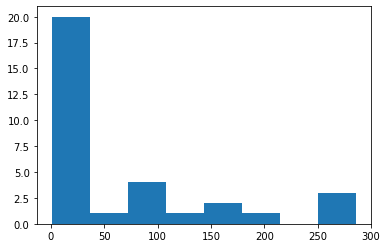

In [81]:
x = [2, 1, 76, 140, 286, 267, 60, 271, 5, 13, 9, 76, 77, 6, 2, 27, 22, 1, 12, 7, 19, 
     81, 11, 173, 13, 7, 16, 19, 23, 197, 167, 1]
plt.hist(x, bins=8) # chose 8 bins because that looked best to author.
plt.show() 

(array([3., 2., 1., 4., 5., 5., 0., 5., 1., 6.]),
 array([0.        , 0.2456366 , 0.49127321, 0.73690981, 0.98254641,
        1.22818302, 1.47381962, 1.71945622, 1.96509283, 2.21072943,
        2.45636603]),
 <BarContainer object of 10 artists>)

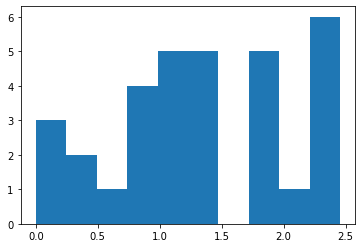

In [86]:
plt.hist(np.log10(x))

### Who are the top sellers? 

You cannot do total sales, should be per year, per season